## [Data Description](https://www.kaggle.com/toramky/automobile-dataset)

In [1]:
# For Loading and Manipulating data
import pandas as pd
import numpy as np

# To display all the columns and the rows ( regardless of their number or their width )
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# For visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# To change the style of the plots ( so that all people can see the same colors )
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('Automobile_data.csv', na_values=['?'])

**Now after loading the data, let's look at it `Generally`.**

Columns...

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Shape...

In [4]:
df.shape

(205, 26)

dataType of each column...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Null Values... (Note: We can get the number of null values from above but i prefer this direct method)

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Duplicates...

In [7]:
df.duplicated().sum()

0

# Summary
There are _205 records_ (rows) and _26 features_ (columns). Here is what i am going to do in the cleaning stage.

> **Renaming columns so that:**
  - it begins with a capital letter
  - convert "-" to "_"
  
> **Adjusting dataTypes:** `Note`:Some Numeric columns have an object dataType because each number is written in letters. So i will take advantage of the fact that they are discrete and leave them as they are because this will be more convenient in visualizations
  - symboling: int64 --> object ( Also this is just for visualization purposes )
 
> **Missing Values:** I can't say what i am gonna do with missing values in each column so i will decide after some digging. 
  - normalized losses: 41 NaNs
  - num of doors: 2 NaNs
  - bore: 4 NaNs
  - stroke: 4 NaNs
  - horsepower: 2 NaNs
  - peak rpm: 2 NaNs
  - price: 4 NaNs

<font color='green'>
<h1><center> Let's begin cleaning </center></h1>

Renaming columns...

In [8]:
new_names = []
for col_name in df.columns:
    new_names.append(col_name.capitalize().replace('-', '_'))

df.columns = new_names

- Test

In [9]:
df.head()

,Symboling,Normalized_losses,Make,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,Length,Width,Height,Curb_weight,Engine_type,Num_of_cylinders,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Adjusting dataTypes...

In [10]:
df['Symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [11]:
df['Symboling'] = df['Symboling'].replace({3 :'Pretty Risky (3)',
                                           2 :'Very Risky (2)',
                                           1 :'Risky (1)',
                                           0 :'Normal (0)',
                                           -1:'Safe (-1)',
                                           -2:'Very Safe (-2)'})

- Test

In [12]:
df['Symboling'].dtype

dtype('O')

In [13]:
df['Symboling'].unique()

array(['Pretty Risky (3)', 'Risky (1)', 'Very Risky (2)', 'Normal (0)',
       'Safe (-1)', 'Very Safe (-2)'], dtype=object)

Missing Values...

Let's see if there is a record that has null values in these _seven columns_: 

["Normalized_losses", "Num_of_doors", "Bore", "Stroke", "Horsepower", "Peak_rpm", "Price"]

In [14]:
df[df[["Normalized_losses", "Num_of_doors", "Bore", "Stroke", "Horsepower", "Peak_rpm", "Price"]].isnull().all(axis=1)]

,Symboling,Normalized_losses,Make,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,Length,Width,Height,Curb_weight,Engine_type,Num_of_cylinders,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price


> There is not any record that has null values in all of these columns. 

As the maximum number of null values in ["Num_of_doors", "Bore", "Stroke", "Horsepower", "Peak_rpm", "Price"] is 4 which is a relatively small number. I will avoid fill the data with _fake values_ and drop there records.

Before...

In [15]:
df.shape

(205, 26)

After...

In [16]:
df.dropna(subset=["Num_of_doors", "Bore", "Stroke", "Horsepower", "Peak_rpm", "Price"]).shape

(193, 26)

> As we can see the size hasn't affected dramatically

In [17]:
df.dropna(subset=["Num_of_doors", "Bore", "Stroke", "Horsepower", "Peak_rpm", "Price"], inplace=True)

- Test

In [18]:
df.isnull().sum()

Symboling             0
Normalized_losses    34
Make                  0
Fuel_type             0
Aspiration            0
Num_of_doors          0
Body_style            0
Drive_wheels          0
Engine_location       0
Wheel_base            0
Length                0
Width                 0
Height                0
Curb_weight           0
Engine_type           0
Num_of_cylinders      0
Engine_size           0
Fuel_system           0
Bore                  0
Stroke                0
Compression_ratio     0
Horsepower            0
Peak_rpm              0
City_mpg              0
Highway_mpg           0
Price                 0
dtype: int64

Now let's see how we will handle the remaining null values ( Normalized_loss null values )

In the description:

````
The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.
````

So we can fill the NaNs according to these features ( Number_of_doors, Size=Length * Width * Height )

In [19]:
# first let's create "Size" columns
df['Size'] = df['Length']*df['Width']*df['Height']

# let's divide it into 3 quantiles
df['Size_cat'] = pd.qcut(df['Size'], 3, labels=['small', 'medium', 'large'])

# Droping
df.drop(columns=['Length', 'Width', 'Height'], inplace=True)

In [20]:
from itertools import product

comb = product(df['Num_of_doors'].unique(), df['Size_cat'].unique())
for n_doors, size in comb:
    mask = (df['Num_of_doors'] == n_doors)&(df['Size_cat'] == size)
    mean = df[mask].dropna()['Normalized_losses'].mean()
    df.loc[(df['Normalized_losses'].isnull())&mask, 'Normalized_losses'] = mean
    
# That is all i want from this column "Size_cat"
df.drop(columns=['Size_cat'], inplace=True)

- Test

In [21]:
df.isnull().sum()

Symboling            0
Normalized_losses    0
Make                 0
Fuel_type            0
Aspiration           0
Num_of_doors         0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Curb_weight          0
Engine_type          0
Num_of_cylinders     0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
Price                0
Size                 0
dtype: int64

> Done :)

<font color='green'>
<h1><center> Now It's time for some exploration </center></h1>
</font>

<center>Note: This data is too small, so the following results are relative to this dataset and not general.</center>

In [22]:
df.head()

,Symboling,Normalized_losses,Make,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,Curb_weight,Engine_type,Num_of_cylinders,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price,Size
0,Pretty Risky (3),132.600000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,528019.904
1,Pretty Risky (3),132.600000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,528019.904
2,Risky (1),144.705882,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,587592.640
3,Very Risky (2),164.000000,audi,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,634816.956
4,Very Risky (2),164.000000,audi,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,636734.832


In [23]:
# Helping Functions
def Histo(data, x, ax=None, kde=False):
    # Main plot
    ax = sns.histplot(data[x], ax=ax, kde=kde, color='blue')
    
    # Adding title
    ax.set_title(f'{x} distribution', fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
        
    ax.set_ylabel('Number of People', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
#===========================================================================================================================#   
def CountPlot(data, x, y=None, hue=None, ax=None):
    # Order
    if x:
        order = data[x].value_counts().index
    else:
        order = data[y].value_counts().index
        
    # Main plot
    ax = sns.countplot(data=data, x=x, y=y, ax=ax, hue=hue, order=order)
    
    if x:
        # Looping over each column
        for patch in ax.patches:
            loc    = patch.get_x()
            height = patch.get_height()
            width  = patch.get_width()
            
            if height > 0:
                ax.text(loc+width/2, 1.01*height, str(height), weight='bold', ha="center", fontsize=15)
    
    # Adding title
    if x:
        ax.set_title(f'{x} distribution', fontsize=20, color='brown')
    else:
        ax.set_title(f'{y} distribution', fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    
    if y:
        ax.set_ylabel(f'{y}', fontsize=15)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
    
    
    # Adding legend
    if hue:
        ax.legend(labels=list(data[hue].unique()),  prop={"size":15}, frameon=True, shadow=True, loc=1);
#===========================================================================================================================#   
def BarPlot(data, x, y, ax=None, hue=None):
    # Order 
    order = data[[x, y]].groupby(x).mean().sort_values(by=y, ascending=False).index
    
    # Main plot
    ax = sns.barplot(data=data, x=x, y=y, hue=hue, ci=None, ax=ax, order=order)
    
    # Adding title
    ax.set_title(f'{x} distribution', fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
        
    ax.set_ylabel(f'Average {y}', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
    
    # Adding legend
    if hue:
        ax.legend(labels=list(data[hue].unique()),  prop={"size":20}, frameon=True, shadow=True);
#===========================================================================================================================#       
def ScatterPlot(data, x, y, hue=None, ax=None):
    # Main plot
    ax = sns.scatterplot(data=data, x=x, y=y, hue=hue, ax=ax, alpha=0.7)
    
    # Adding title
    corr = data[x].corr(data[y])
    if hue:
        ax.set_title(f"{x} with {y} by {hue}\n (Corr = {round(corr, 2)})", fontsize=25, color='brown')
    else:
        ax.set_title(f"{x} and {y}\n(Corr = {round(corr, 2)})", fontsize=25, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    
    ax.set_ylabel(y, fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
    
    # Adding legend
    if hue:
        ax.legend(labels=list(data[hue].unique()),  prop={"size":20}, frameon=True, shadow=True);
#===========================================================================================================================# 
def PiePlot(data, x):
    sorted_counts = data[x].value_counts()
    
    # main plot
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                 counterclock = False, radius = 1.2, textprops={'fontsize': 16})
    
    # title
    plt.title(f'{x} Distribution',fontsize=15, weight='bold', color='brown', loc='center', y=1.1)
#===========================================================================================================================# 
def BoxPlot(data, x, hue=None, ax=None):
    # Main plot
    ax = sns.boxplot(data=df, x=x, hue=hue, ax=ax)
    
    # Adding title
    ax.set_title(f"Distribution of {x}", fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    
    # Adding legend
    if hue:
        ax.legend(labels=list(data[hue].unique()),  prop={"size":20}, frameon=True, shadow=True);

<font color='blue'>
<h1><center> Univariate EDA </center></h1>

_CAT_columns_

In [24]:
df.select_dtypes('object').nunique()

Symboling            6
Make                21
Fuel_type            2
Aspiration           2
Num_of_doors         2
Body_style           5
Drive_wheels         3
Engine_location      2
Engine_type          5
Num_of_cylinders     6
Fuel_system          7
dtype: int64

In [25]:
df_cat = df.select_dtypes('object').copy()
small_unique = df_cat.nunique()[df_cat.nunique()<=3].index
medium_unique = df_cat.nunique()[(df_cat.nunique()>3)&(df_cat.nunique()<10)].index
large_unique = df_cat.nunique()[df_cat.nunique()>10].index

_small_unique_

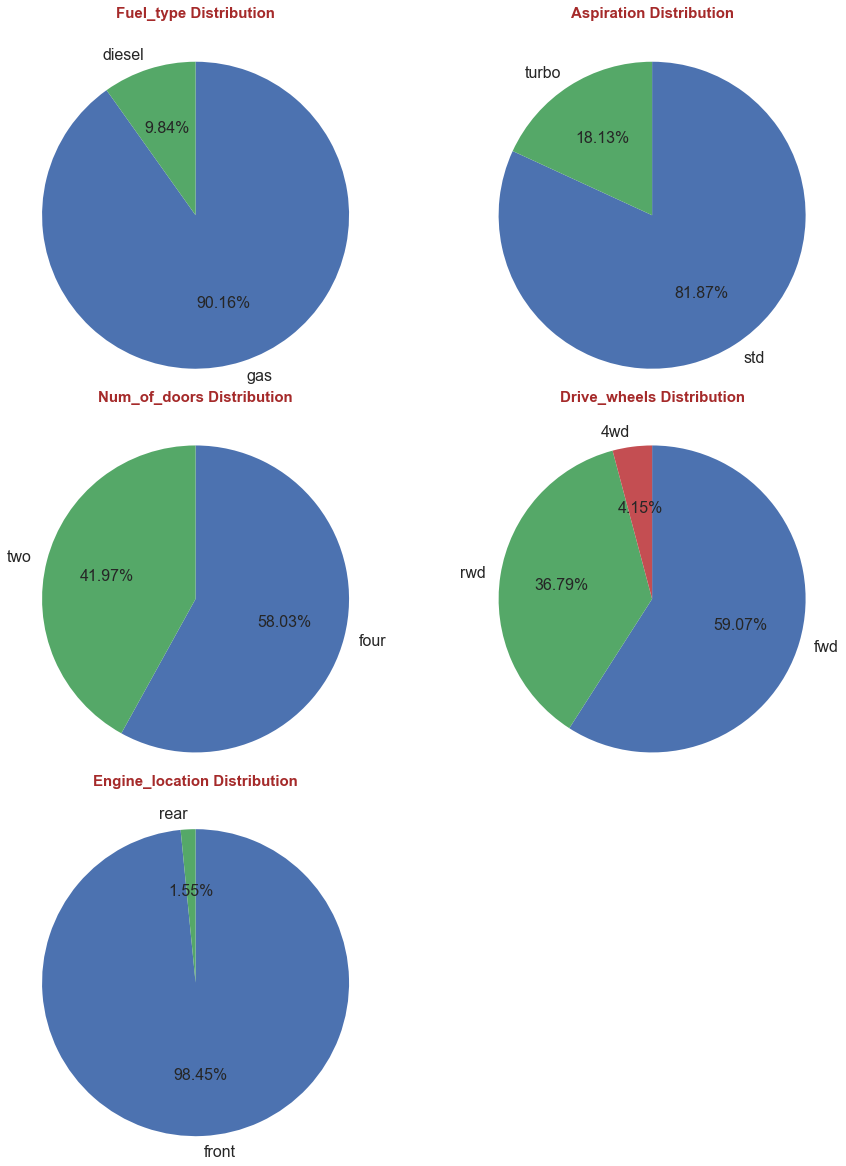

In [26]:
plt.figure(figsize=(15,20))
for i, col in enumerate(small_unique):
    plt.subplot(3, 2, i+1)
    PiePlot(df, col)

> Most of the cars are:
  - Having Fuel type of Gas 
  - Standard Aspiration
  - four doors
  - front wheel drive (fwd)
  - Engine location (Front)

_medium_unique_

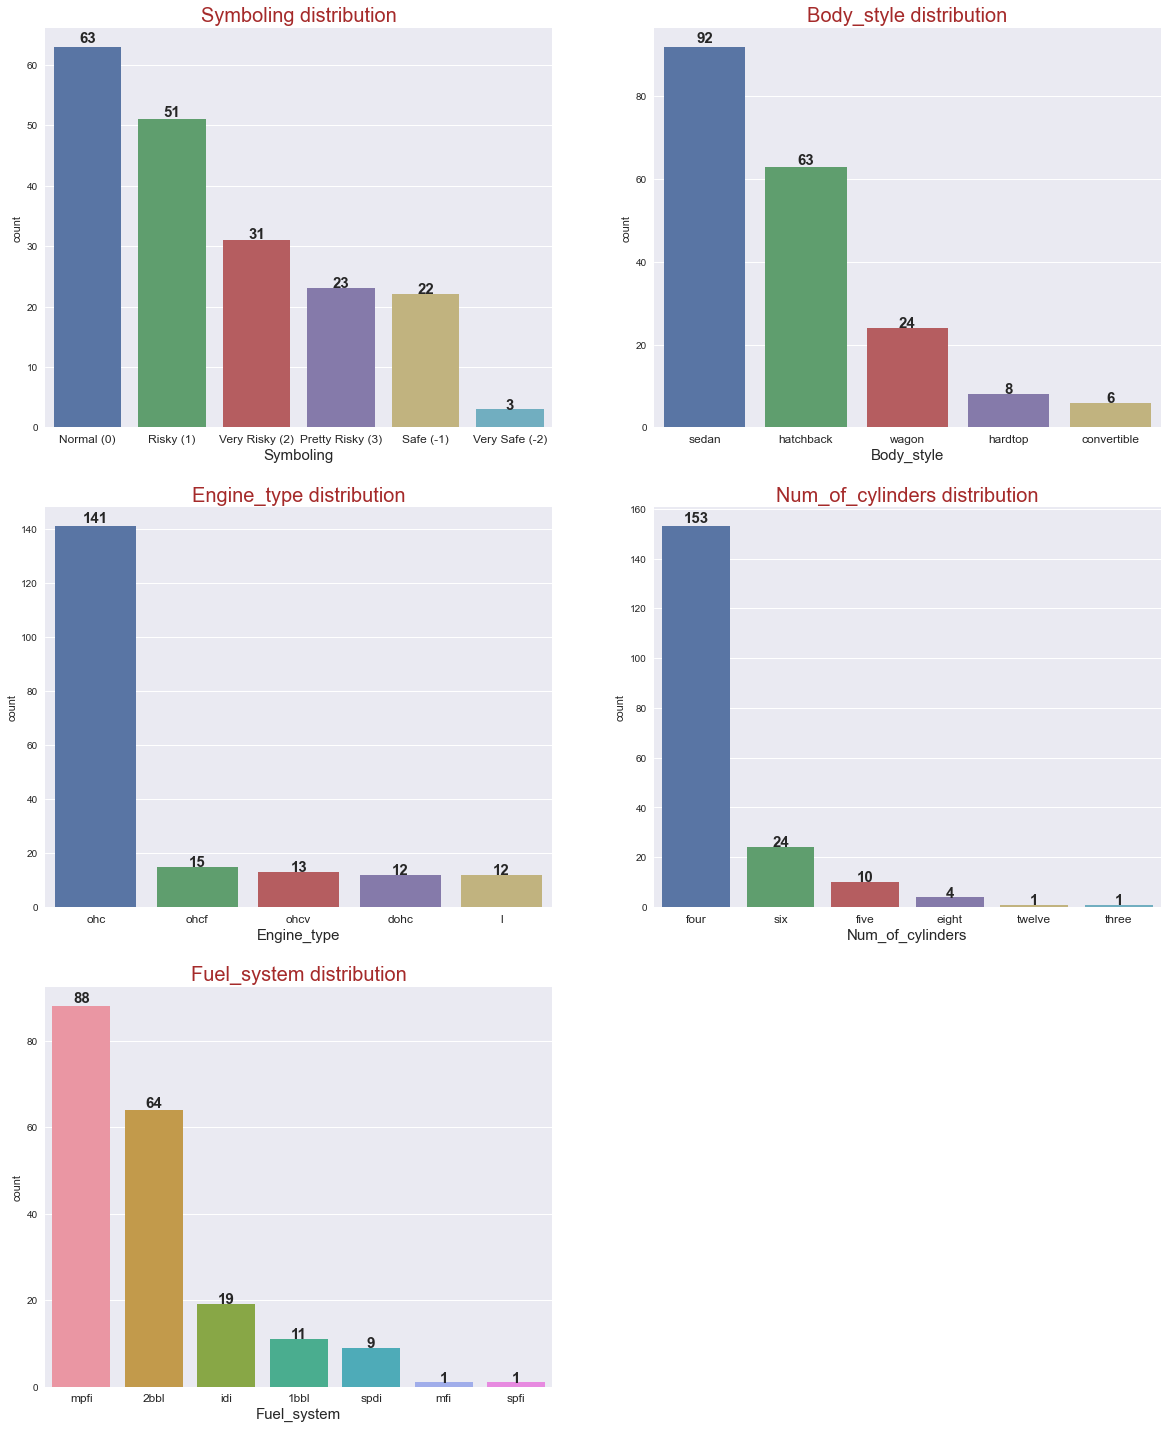

In [27]:
plt.figure(figsize=(20,25))
for i, col in enumerate(medium_unique):
    plt.subplot(3, 2, i+1)
    CountPlot(df, col)

> The unbalance in Symboling is acceptable but the remaining columns are very unbalanced. This should be taken into our consideration in Bivariate EDA and Multivariate EDA.

_large_unique_

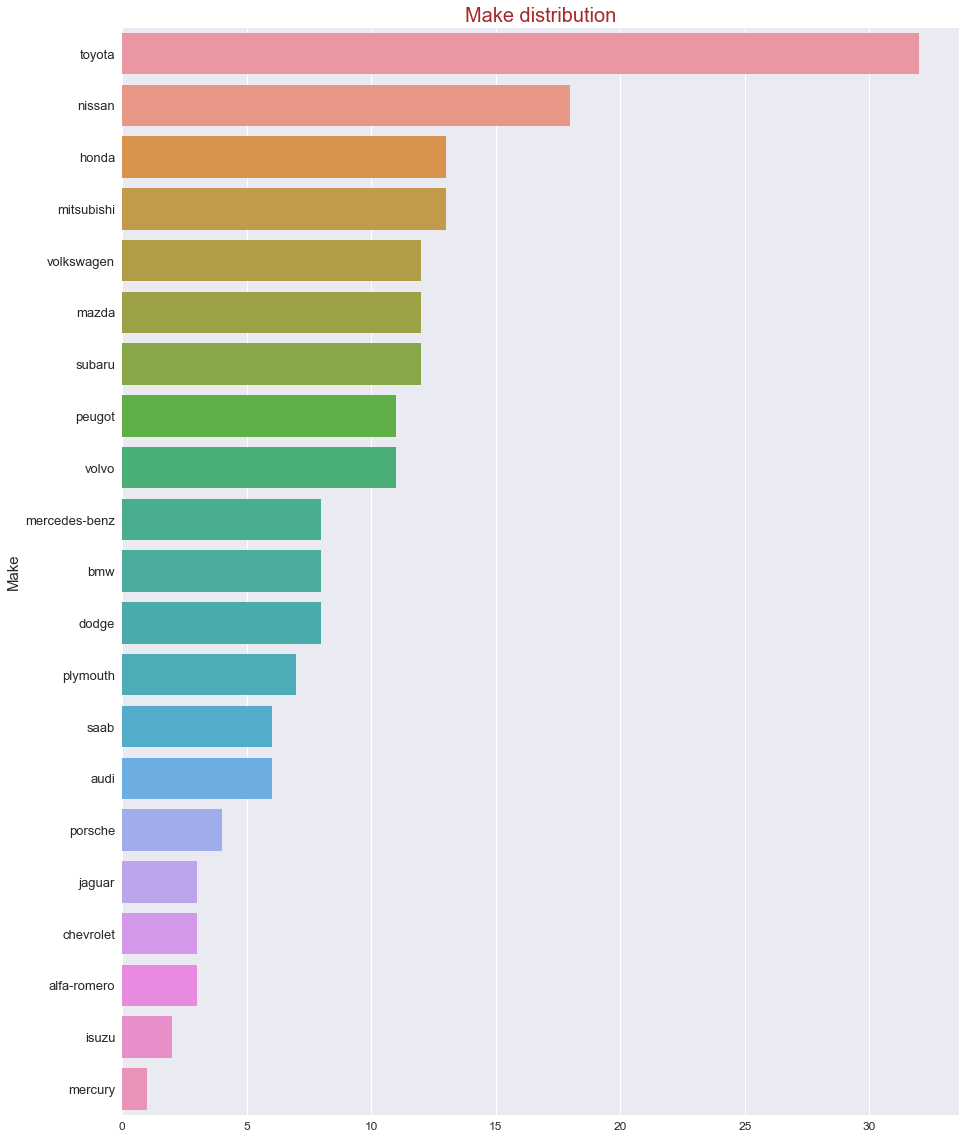

In [28]:
plt.figure(figsize=(15, 20))
CountPlot(df, x=None, y=large_unique[0])

> It's very obvious that Most cars in this dataset are made by Toyota.

_Num_columns_

In [29]:
num_columns = df.select_dtypes(['float64', 'int64']).columns

In [30]:
len(num_columns)

13

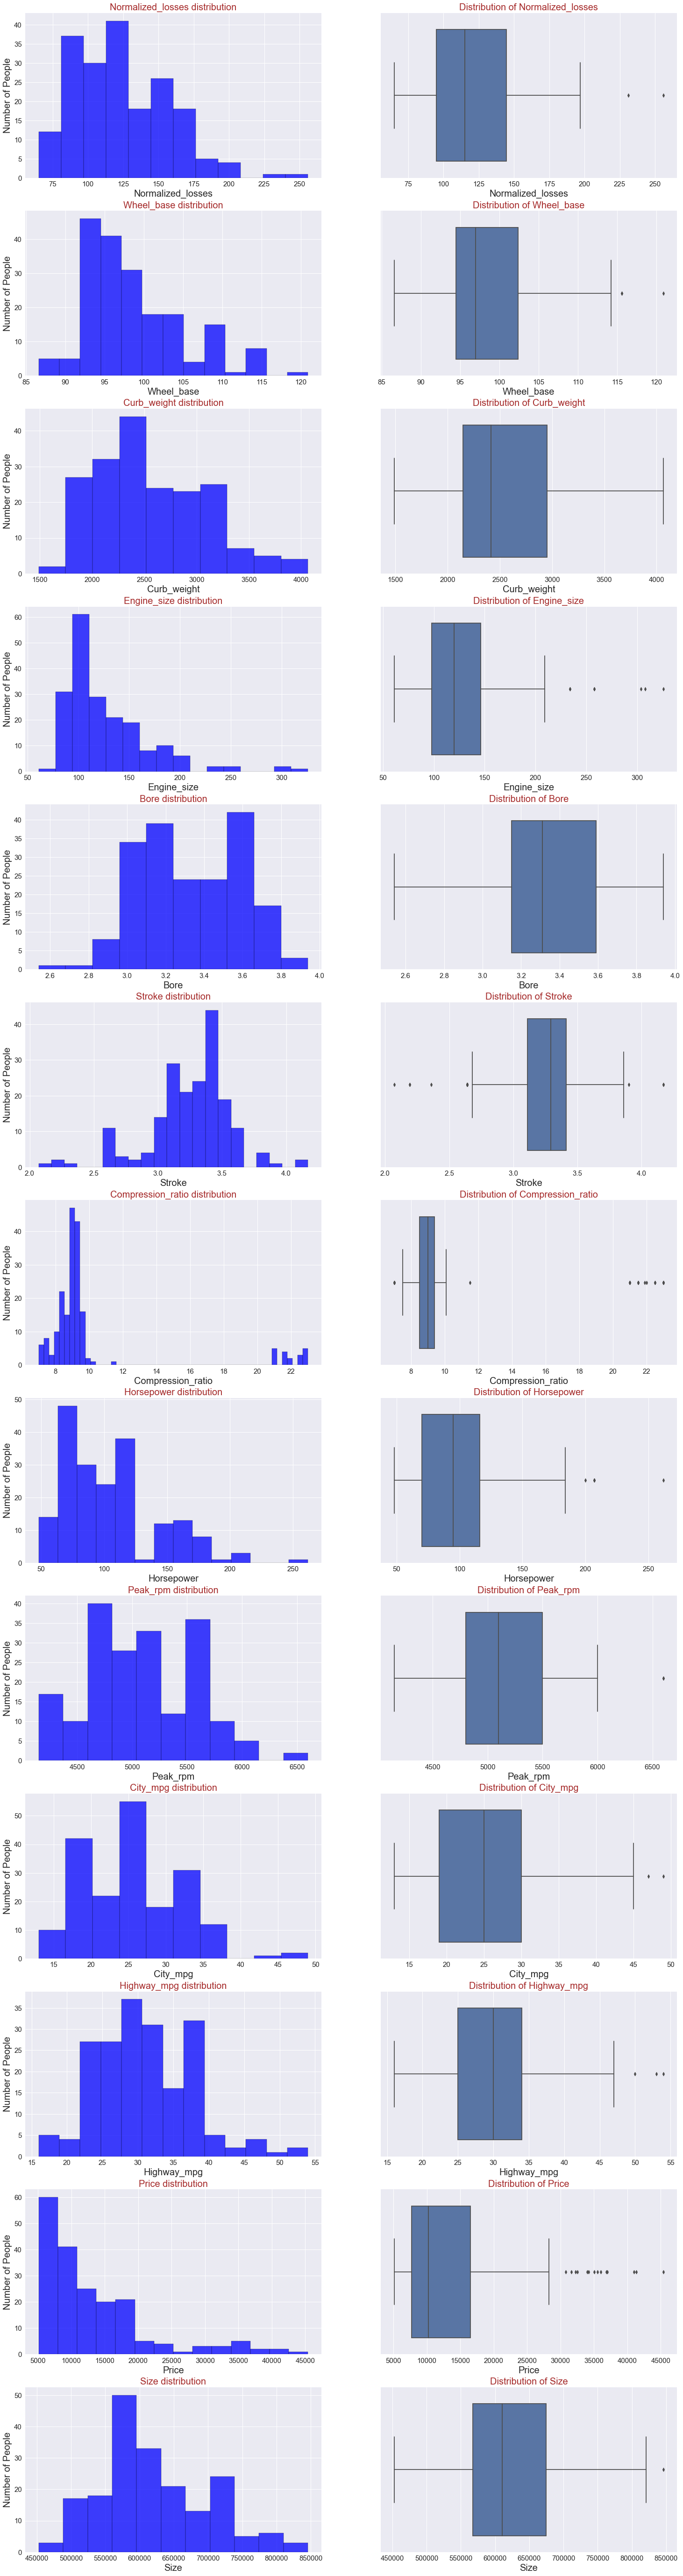

In [31]:
plt.figure(figsize=(25, 100))
for i, col in enumerate(num_columns):
    plt.subplot(13, 2, i*2+1)
    Histo(df, col)
    plt.subplot(13, 2, i*2+2)
    BoxPlot(df, col)

In [32]:
df.columns

Index(['Symboling', 'Normalized_losses', 'Make', 'Fuel_type', 'Aspiration',
       'Num_of_doors', 'Body_style', 'Drive_wheels', 'Engine_location',
       'Wheel_base', 'Curb_weight', 'Engine_type', 'Num_of_cylinders',
       'Engine_size', 'Fuel_system', 'Bore', 'Stroke', 'Compression_ratio',
       'Horsepower', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'Price', 'Size'],
      dtype='object')

From the above plots we can divide numeric features to:
> **Features that have low number or zero outliers:**
   - Normalized_Losses ( slightly skewed to the right )
   - Wheel_base ( skewed to the right )
   - Curb_weight ( approximately normal )
   - Bore ( approximately normal )
   - Horsepower ( skewed to the right )
   - Peak_rpm ( approximately normal )
   - City_mpg ( approximately normal )
   - Highway_mpg ( approximately normal )
   - Size ( approximately normal )

> **Features that have a relatively large number of outliers:**
   - Engine_size ( skewed to the right - without outliers - )
   - Stroke ( approximately normal - without outliers - )
   - Compression_ratio ( approximately normal - without outliers - )
   - Proce ( skewed to the right - without outliers - )
   
**Note:** after detecting outliers i should build do one of these three:
  - Filling them as i fill NaNs.
  - Dropping them.
  - Keeping Them.
  
But here in the analysis stage i can't decide which one is better as it depends on the perfomance of the model ( the one that make the model perform better is the best ). All i can do here is making assumptions if these outliers are really important or not. But wait, here i am doing a general analysis so i don't have a specific target (Like: Symboling, Price, ...etc) **`the outliers are important to what ???!!`**. so all i am gonna do here is keeping them until we take a task on modeling :).

<font color='blue'>
<h1><center> Bivariate EDA </center></h1>

## Q1: What is the company that produce the highest number of  risky cars?

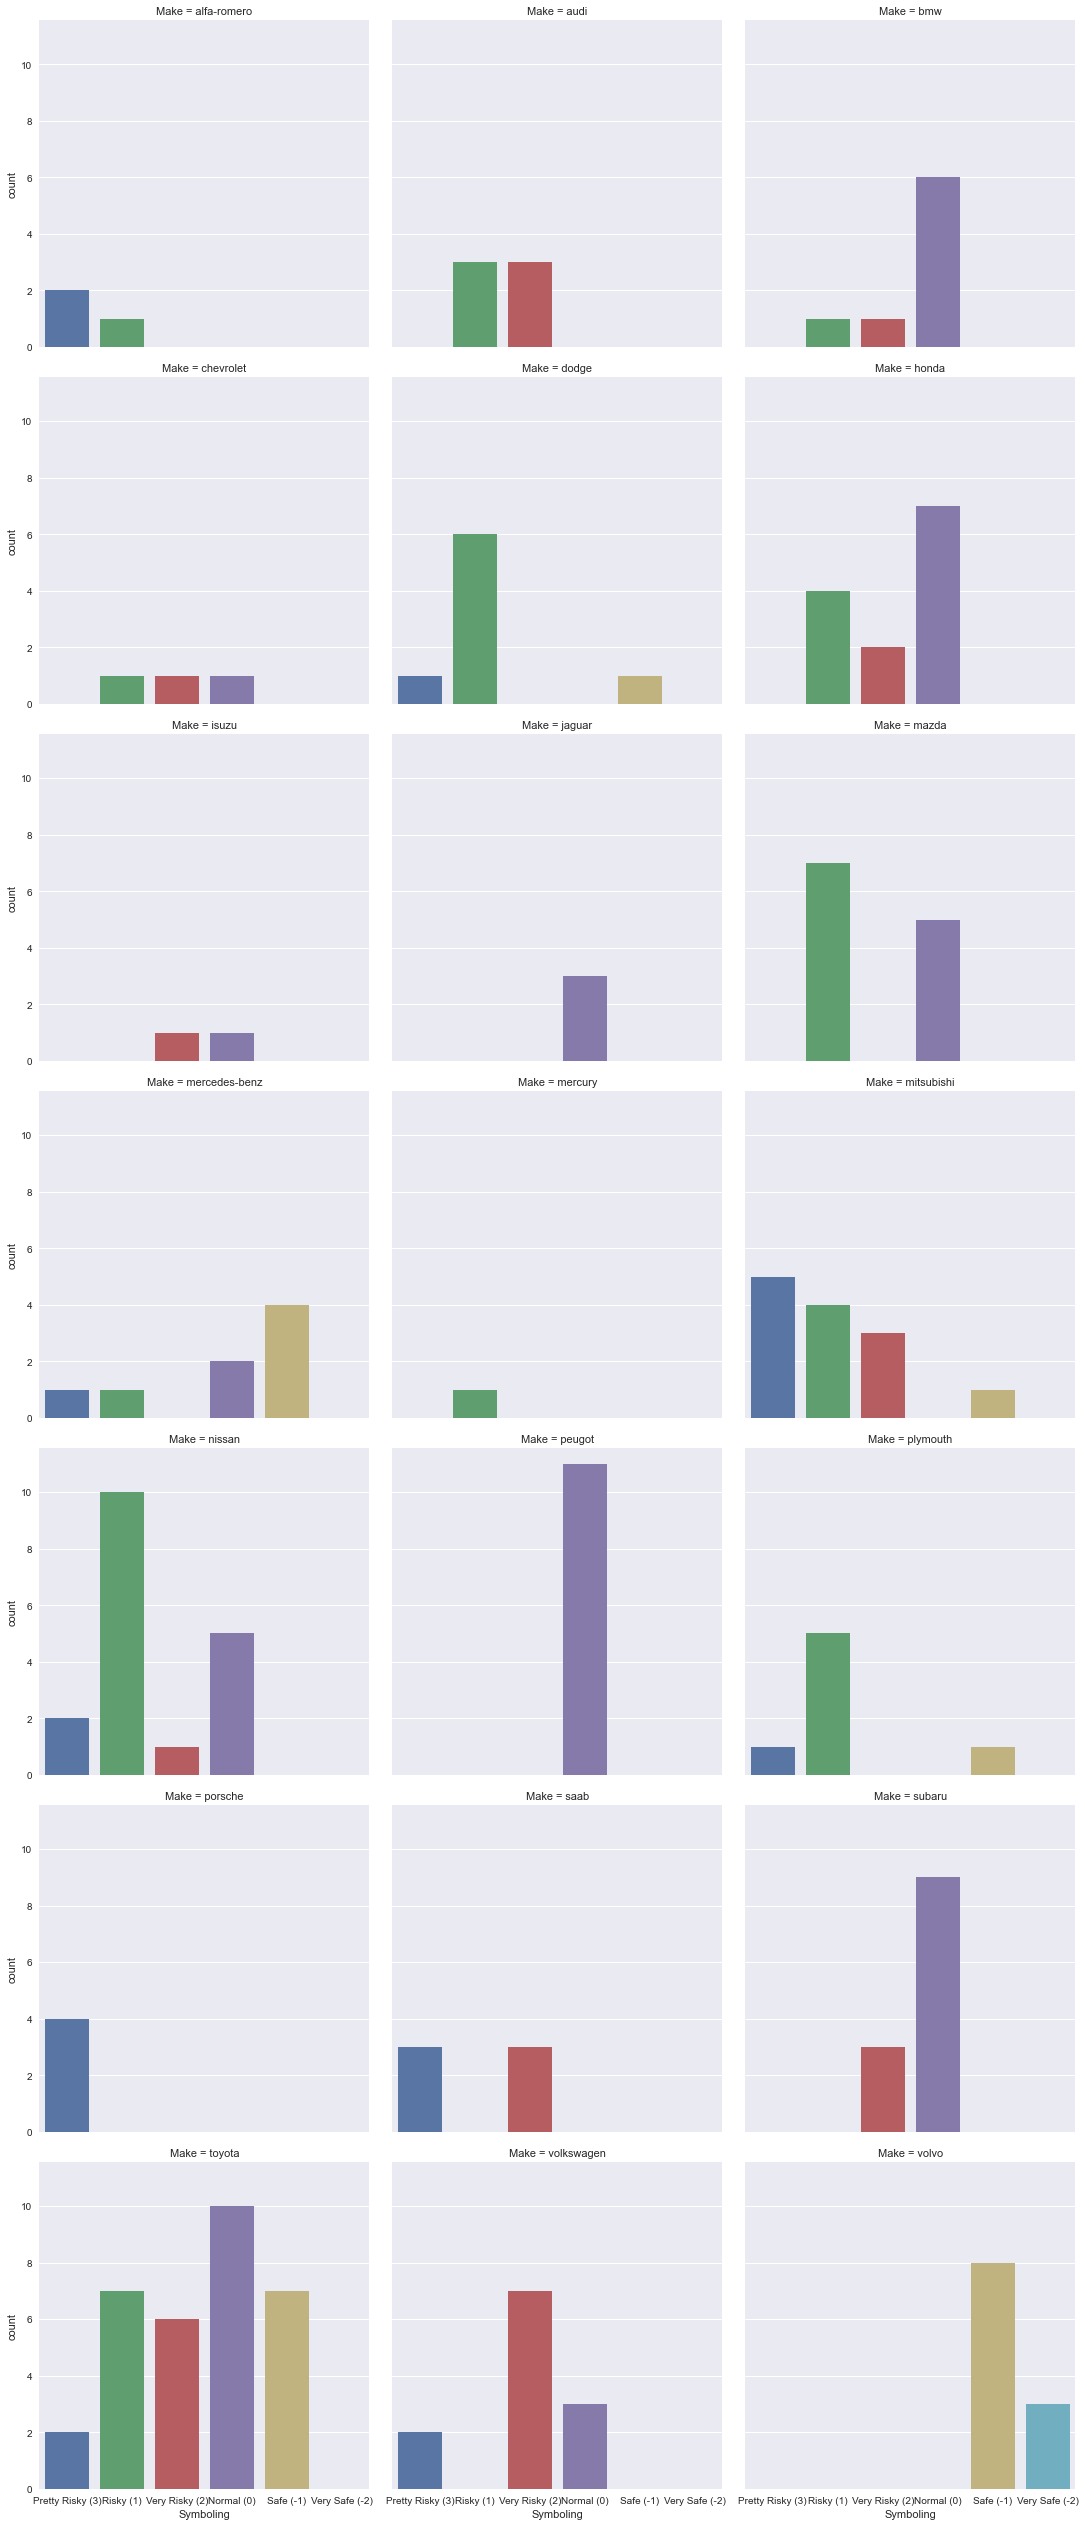

In [33]:
sns.catplot(data=df, x='Symboling', col='Make', col_wrap=3, kind='count');

> We can see that porsche prodeuces the largest number of risky cars and we can't ignore the "very risky" cars produced by nissan. And on the other hand we can say that volvo produce the most safe cars.

## Q2: What is the correlation between size and price?

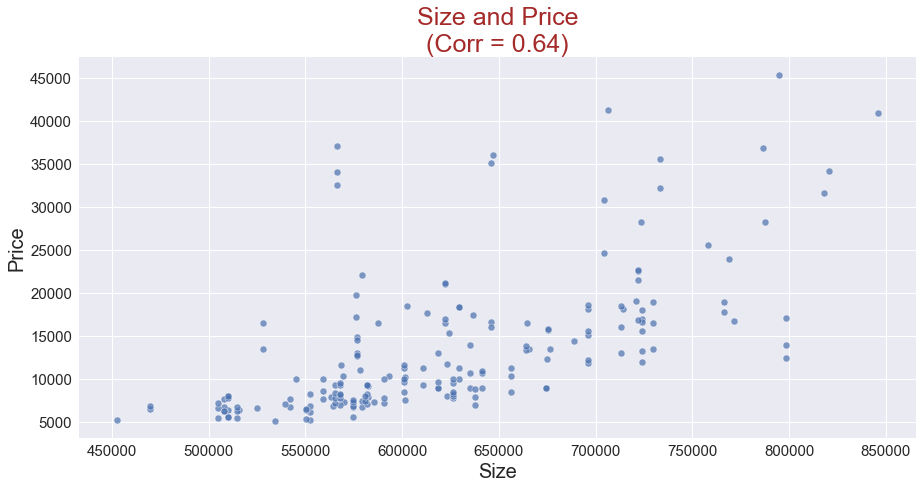

In [34]:
plt.figure(figsize=(15, 7))
ScatterPlot(df, 'Size', 'Price')

> WoW 0.64 is a _strong correlation._

## Q3: Are the expensive cars more safe than cheep ones?

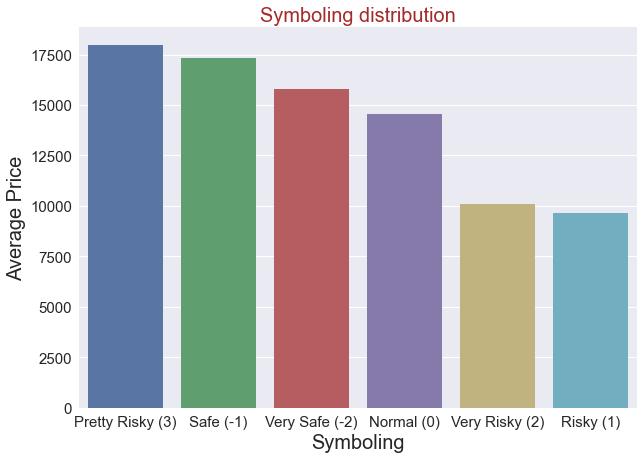

In [35]:
plt.figure(figsize=(10, 7))
BarPlot(df, 'Symboling', 'Price')

> As we can see the Price doesn't guarantee safety.

## Q4: Does the fuel type affect the price?

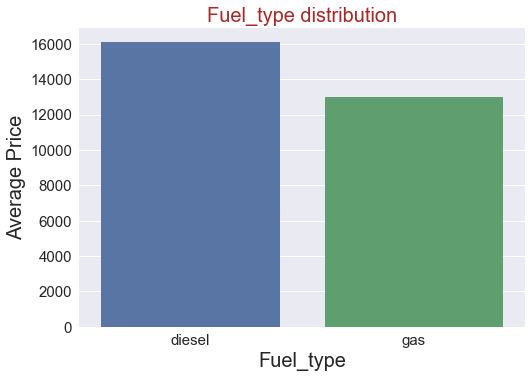

In [36]:
BarPlot(df, 'Fuel_type', 'Price')

> Yeah, it seems that cars that depends on diesel are more expensive.

## Q5: Does the body style affect the safety?

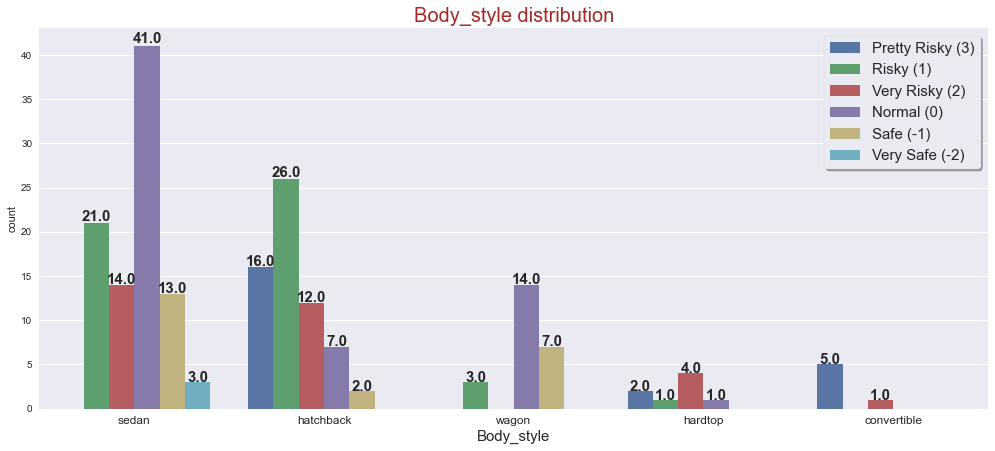

In [37]:
plt.figure(figsize=(17, 7))
CountPlot(df, 'Body_style', hue='Symboling')

Before judging. We've seen in the univariate EDA that the "Body_style" column is not balanced so we can't compare these results directly.

In [38]:
df['Body_style'].value_counts()

sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: Body_style, dtype: int64

> **For Pretty Risky:**
  - Sedan: ($\frac{0}{92} = {0}\% $)
  - Hatchback: ($\frac{16}{63} = {25.4}\% $)
  - Wagon: ($\frac{0}{24} = {0}\% $)
  - Hardtop: ($\frac{2}{8} = {25}\% $)
  - Convertible: ($\frac{0}{6} = {0}\% $)

> **For Normal:**
  - Sedan: ($\frac{41}{92} = {44.57}\% $)
  - Hatchback: ($\frac{7}{63} = {11.11}\% $)
  - Wagon: ($\frac{14}{24} = {58.33}\% $)
  - Hardtop: ($\frac{1}{8} = {12.5}\% $)
  - Convertible: ($\frac{0}{6} = {0}\% $) 
  
> **For Very Safe:**
  - Sedan: ($\frac{3}{92} = {3.3}\% $)
  - Hatchback: ($\frac{0}{63} = {0}\% $)
  - Wagon: ($\frac{0}{24} = {0}\% $)
  - Hardtop: ($\frac{0}{8} = {0}\% $)
  - Convertible: ($\frac{0}{6} = {0}\% $) 
 
### Conclusion:
- The Hatchback is the most dangerous body style. 
- Sedan and Wagon are safe.

## Q6: Does the size affect the safety?

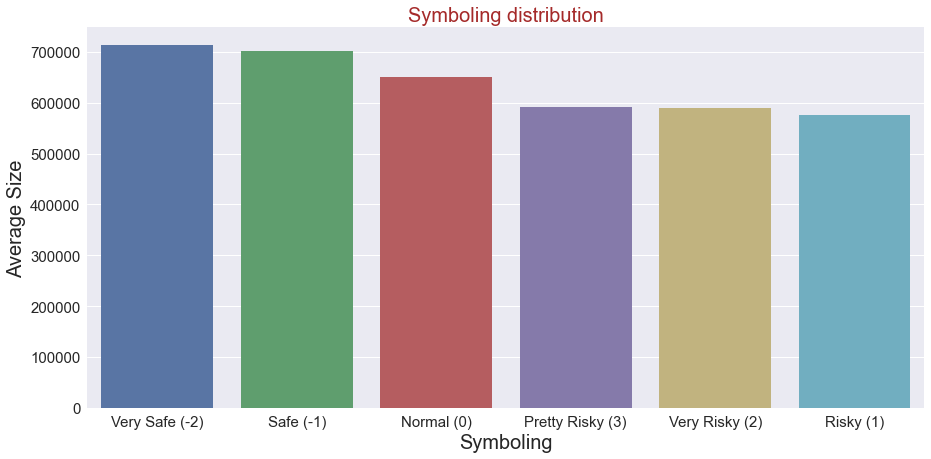

In [39]:
plt.figure(figsize=(15, 7))
BarPlot(df, 'Symboling', 'Size')

> It's very obvious that the larger the car the safer it is.

## Q7: Does the compression ratio affect the safety?

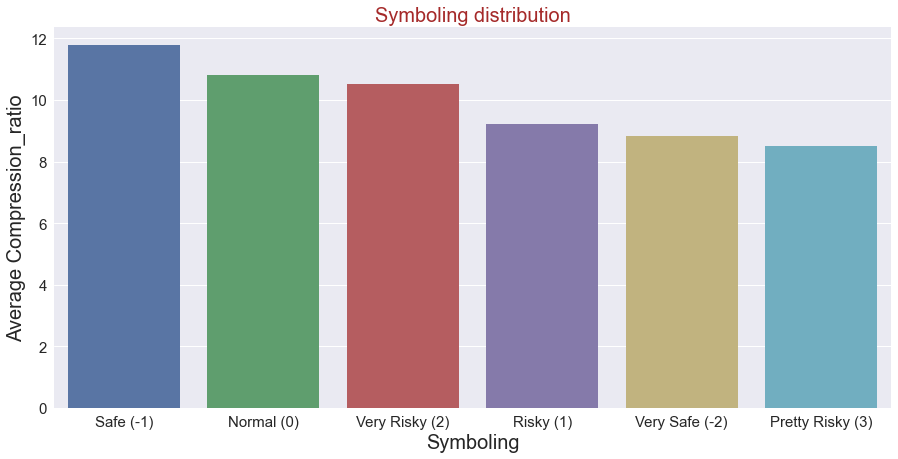

In [40]:
plt.figure(figsize=(15, 7))
BarPlot(df, 'Symboling', 'Compression_ratio')

> No, Idon't think so.

## Q8: Does the compression ratio affect the price?

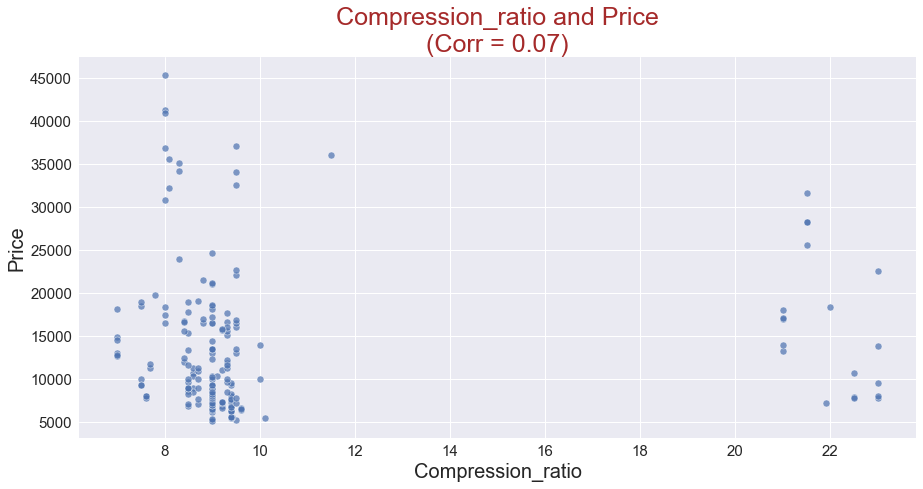

In [41]:
plt.figure(figsize=(15, 7))
ScatterPlot(df, 'Compression_ratio', 'Price')

Without Outliers...

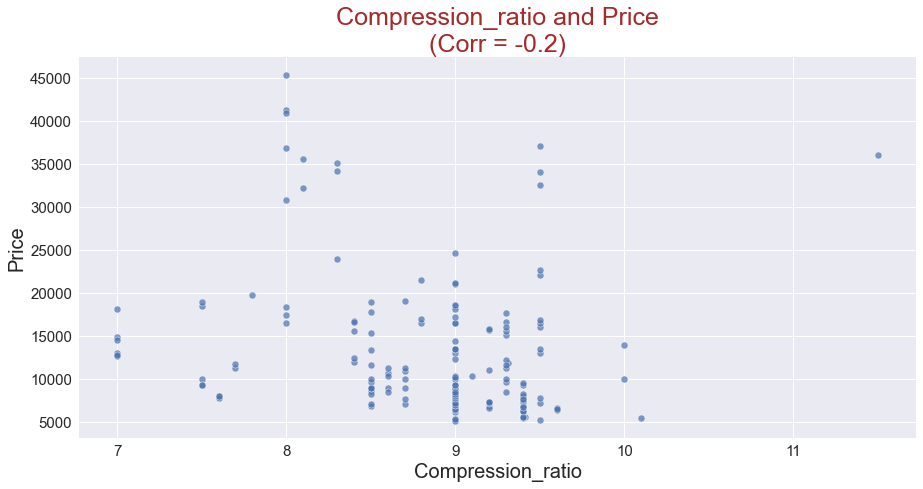

In [42]:
df_temp = df[df['Compression_ratio']<=12].copy()

plt.figure(figsize=(15, 7))
ScatterPlot(df_temp, 'Compression_ratio', 'Price')

> This plot implies a weak negative correlation.

<font color='blue'>
<h1><center> Multivariate EDA </center></h1>

## Q9: Is the answer to Q3 true for all the companies?

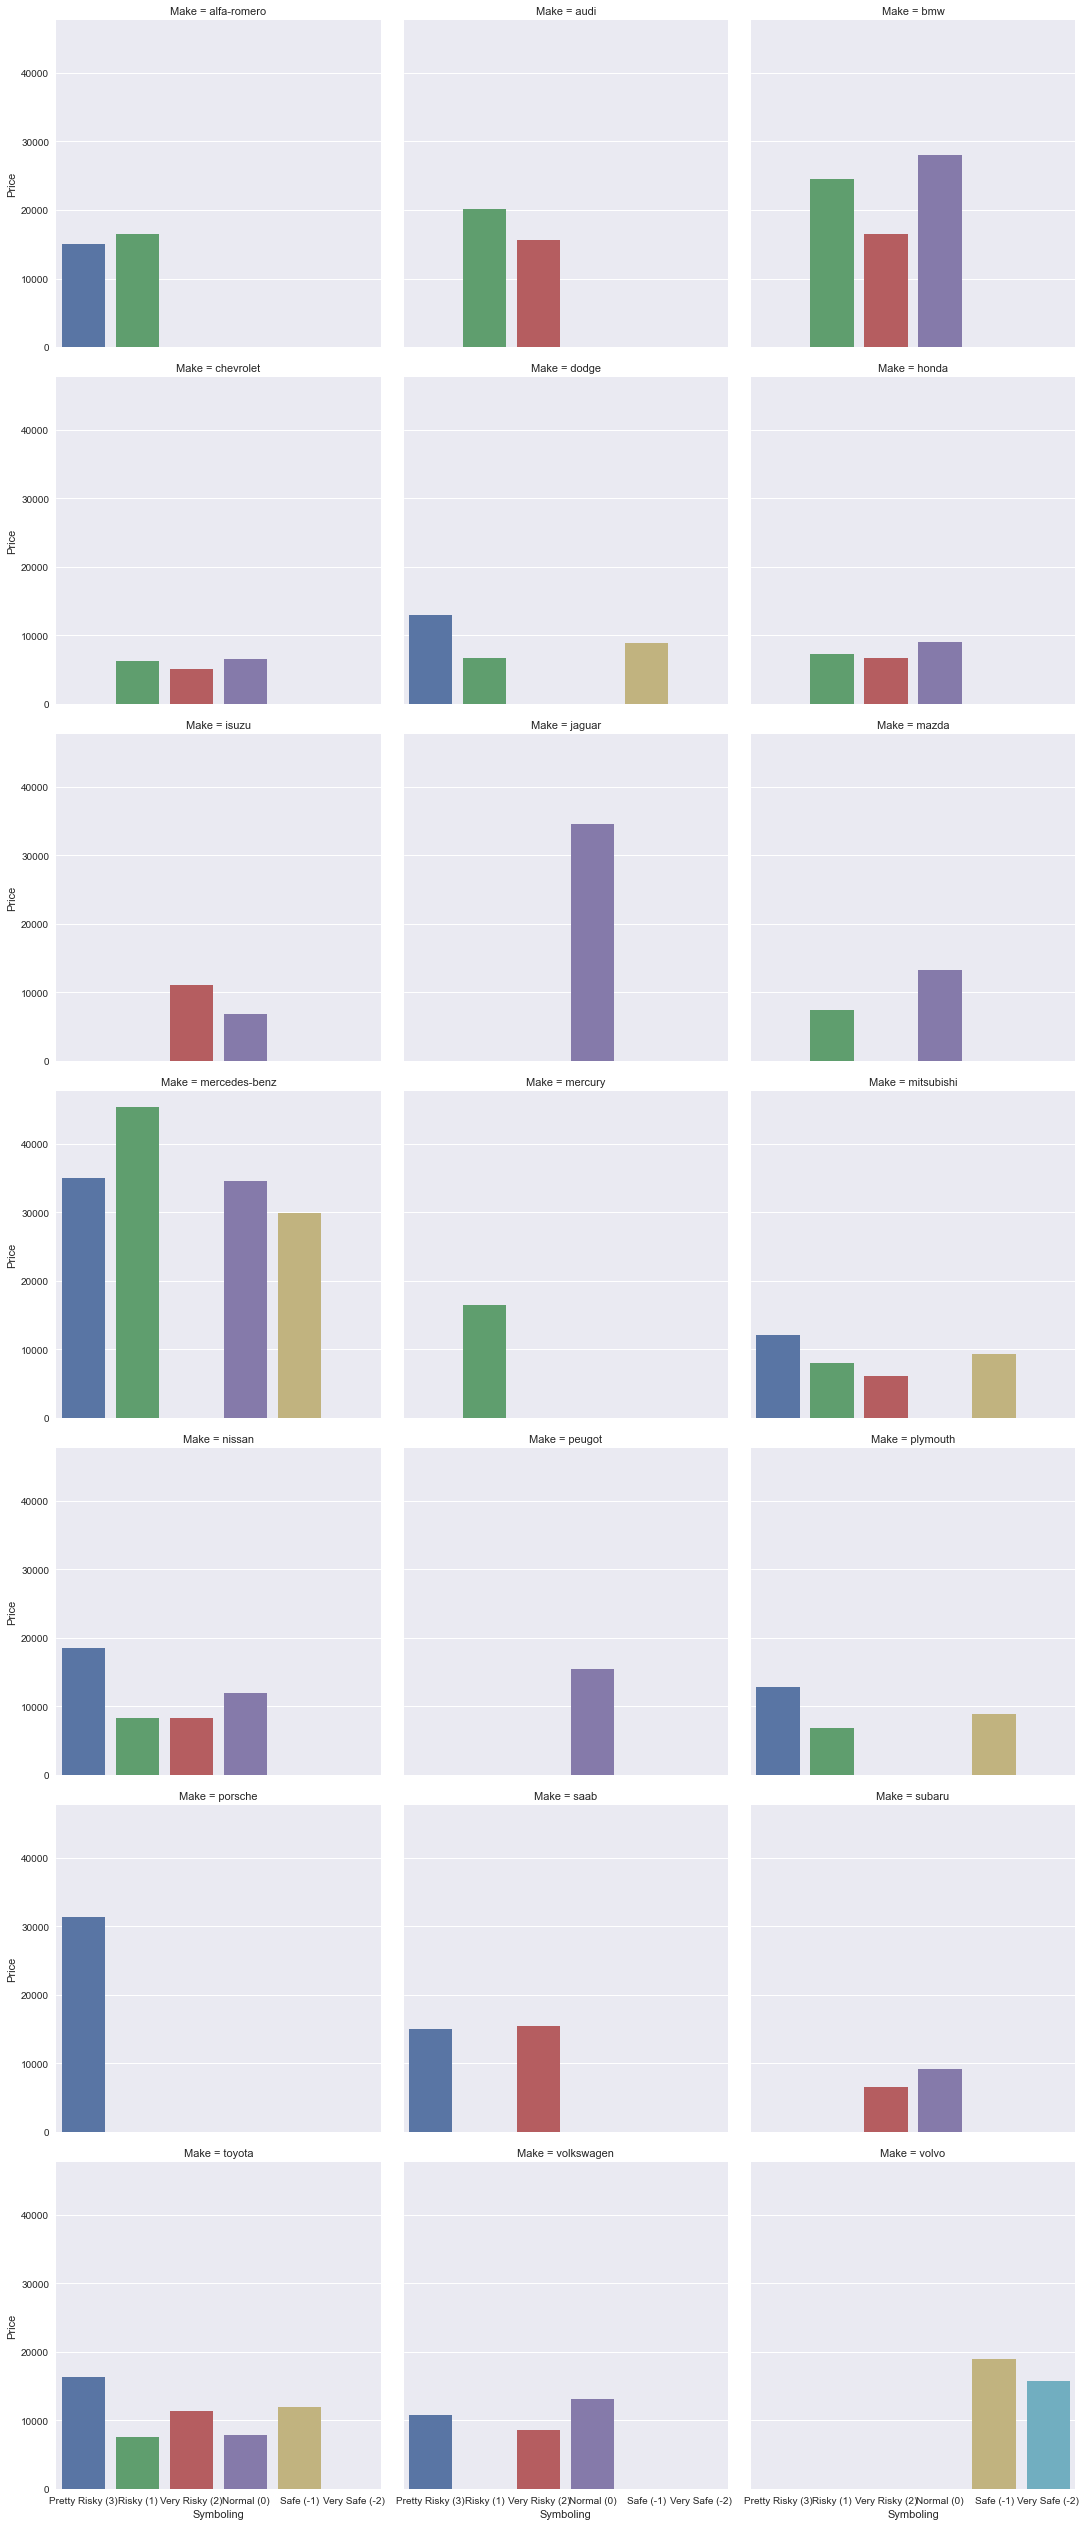

In [43]:
sns.catplot(data=df, x='Symboling', y='Price', kind='bar', col='Make', col_wrap=3, ci=None);

> Obviously, Yes.